##### Long Short-Term Memory Neural Network (LSTM)

In [1]:
# import basic Libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# for timeseries RNN LSTM neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout 

In [3]:
# improt keras TimeSeriesGenerator
# this class produce time series data for RNN LSTM
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

#import minmaxscaler
from sklearn.preprocessing import MinMaxScaler

##### Data set : APPL(Apple stock :01/01/2024-06/30/2019)

In [161]:
#get Apple stock data from yahoo finance from 01/01/20224 t0 06/30/2019
import yfinance as yf
apple = yf.Ticker("AAPL")
apple_stock = apple.history(start="2014-01-01", end="2019-06-30")
apple_stock.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-01-02 00:00:00-05:00,17.313752,17.355814,17.199714,17.234299,234684800,0.0,0.0
2014-01-03 00:00:00-05:00,17.225881,17.252052,16.838589,16.855726,392467600,0.0,0.0
2014-01-06 00:00:00-05:00,16.745739,17.037063,16.625781,16.947641,412610800,0.0,0.0
2014-01-07 00:00:00-05:00,16.959796,17.010894,16.760386,16.826441,317209200,0.0,0.0
2014-01-08 00:00:00-05:00,16.788114,16.998429,16.784376,16.932999,258529600,0.0,0.0


In [162]:
#change date as column 
apple_stock.reset_index(inplace=True)
apple_stock.head()

#change datetime column to date
apple_stock['Date'] = apple_stock['Date'].dt.date   
df_ALL = apple_stock.copy()

#### Brief Exploratory Data Analysis (EDA)

In [163]:
#print shape of the dataframe
df_ALL.shape

(1382, 8)

In [164]:
#check data types of the dataframe
df_ALL.dtypes

Date             object
Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object

In [165]:
#statistical summary of the dataframe
df_ALL.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1382.000000,1382.000000,1382.000000,1382.000000,1.382000e+03,1382.000000,1382.000000
mean,31.456137,31.733240,31.182874,31.466455,1.670774e+08,0.002331,0.005065
std,9.800771,9.897603,9.710730,9.806129,9.220445e+07,0.018603,0.188297
min,15.428702,15.626554,15.377915,15.572027,4.590360e+07,0.000000,0.000000
25%,24.047404,24.305331,23.824503,24.083275,1.045275e+08,0.000000,0.000000
50%,28.195343,28.419511,27.994719,28.218461,1.423682e+08,0.000000,0.000000
75%,40.030326,40.417301,39.636280,39.934355,2.034164e+08,0.000000,0.000000
max,54.914710,55.554808,54.676762,55.221676,1.065523e+09,0.192500,7.000000


### Keep only "Close"

In [166]:
#only get close price
df = df_ALL['Close'].to_frame()


In [167]:
df.head()

,Close
0,17.234299
1,16.855726
2,16.947641
3,16.826441
4,16.932999


<Axes: >

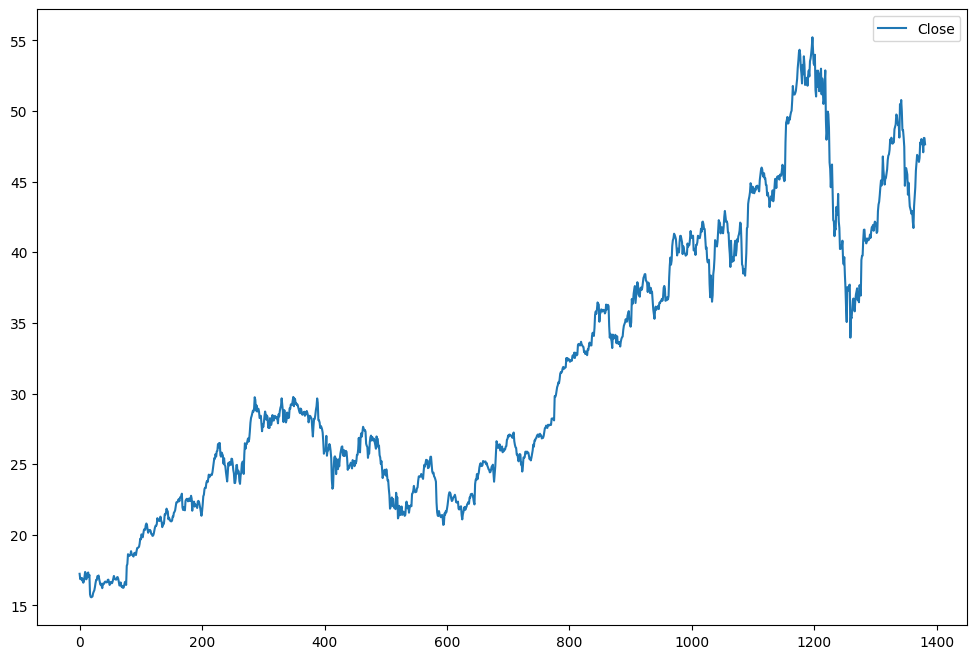

In [168]:
df.plot(figsize=(12,8))

In [169]:
# set the length of the input sequence
lenght60 = 60

In [170]:
lenght60

60

In [171]:
len(df)

1382

In [172]:
# set percentage of the data for training
test_percent = 0.1

In [173]:
# set the length of the test data
test_length = len(df) * test_percent
test_length

138.20000000000002

#### Split Data --> Train/Test

In [174]:
# round the length of the test data
test_length = np.round(len(df)*test_percent)
test_length

138.0

In [175]:
# the testing data set starts at this index

#test_start = int(len(df) - test_length - lenght60)
split_index = int(len(df) - test_length)
split_index

1244

In [176]:
# split the data into training and testing data
data_train = df.iloc[:split_index]

In [177]:
#data_train = df.iloc[:test_start] 
data_test = df.iloc[split_index-lenght60:]

In [178]:
# check the shape of the training and testing data
data_train.head(5)

,Close
0,17.234299
1,16.855726
2,16.947641
3,16.826441
4,16.932999


In [179]:
data_train.tail()

,Close
1239,44.131855
1240,42.190556
1241,41.720150
1242,40.232529
1243,40.497581


In [180]:
scaler = MinMaxScaler()

In [181]:
scaler.fit(data_train)

MinMaxScaler()

In [182]:
#normalize the data      
normalized_train = scaler.transform(data_train)

In [183]:
#normalize the data test
normalized_test = scaler.transform(data_test)

In [184]:
# check the shape of the normalized data
bathc_size32 = 32
# create a time series generator for the training data
train_tsGenerator60 = TimeseriesGenerator(normalized_train, normalized_train, length=lenght60, batch_size=bathc_size32)

In [185]:
len(normalized_train)

1244

In [29]:
len(train_tsGenerator60)

37

In [186]:
# what does the first batch look like
X,y = train_tsGenerator60[0]

In [187]:
# print x
print(X)

[[[0.04192399]
  [0.03237605]
  [0.03469423]
  ...
  [0.03397232]
  [0.03213812]
  [0.03166386]]

 [[0.03237605]
  [0.03469423]
  [0.03163745]
  ...
  [0.03213812]
  [0.03166386]
  [0.03156904]]

 [[0.03469423]
  [0.03163745]
  [0.03432493]
  ...
  [0.03166386]
  [0.03156904]
  [0.03545044]]

 ...

 [[0.03764822]
  [0.03730032]
  [0.03888139]
  ...
  [0.0755145 ]
  [0.07467993]
  [0.0727323 ]]

 [[0.03730032]
  [0.03888139]
  [0.03206726]
  ...
  [0.07467993]
  [0.0727323 ]
  [0.07852742]]

 [[0.03888139]
  [0.03206726]
  [0.02714987]
  ...
  [0.0727323 ]
  [0.07852742]
  [0.0792667 ]]]


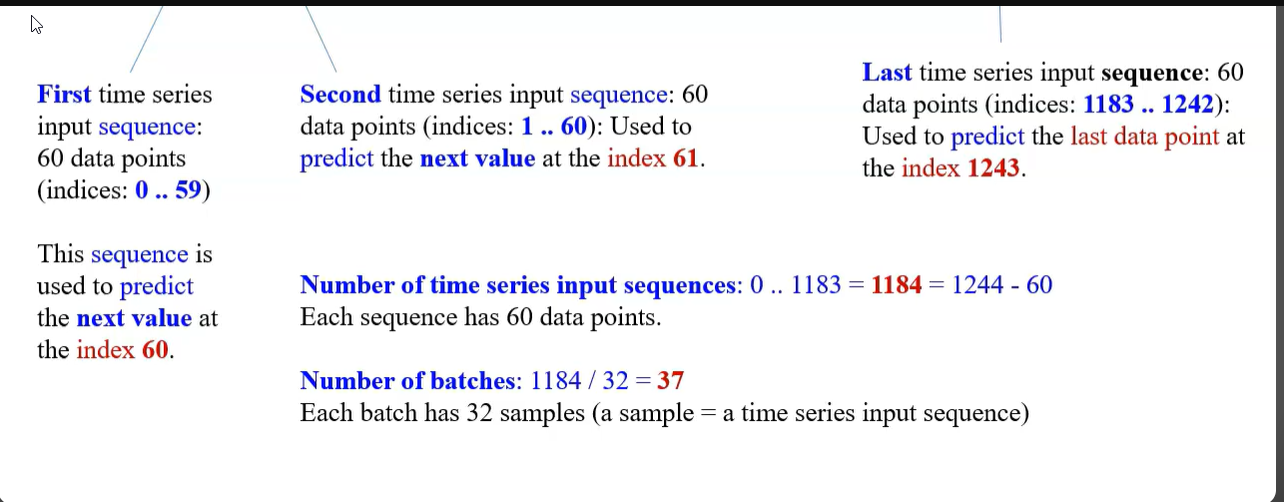

In [188]:
# print y
print(y)

[[0.03156904]
 [0.03545044]
 [0.03616211]
 [0.03318956]
 [0.02767951]
 [0.02107848]
 [0.02105496]
 [0.02649391]
 [0.02108661]
 [0.01802723]
 [0.01966362]
 [0.01672281]
 [0.01755291]
 [0.0222407 ]
 [0.02716574]
 [0.02758464]
 [0.02209052]
 [0.05609911]
 [0.0593957 ]
 [0.07690594]
 [0.0755145 ]
 [0.07374366]
 [0.07484271]
 [0.07571221]
 [0.082337  ]
 [0.07715888]
 [0.0755145 ]
 [0.07467993]
 [0.0727323 ]
 [0.07852742]
 [0.0792667 ]
 [0.0793542 ]]


### Build, Train, and Test Model

In [189]:
# set nummber of features

n_features = 1

In [190]:
# define the model

model = Sequential()

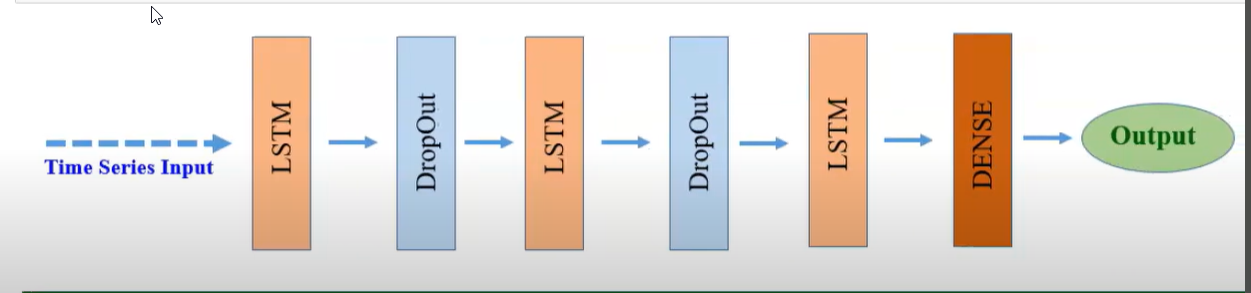

In [191]:
# add LSTM layer
# 50 is the number of neurons
# return_sequence is set to True because we are using another LSTM layer
model.add(LSTM(50, return_sequences=True, input_shape=(lenght60, n_features)))

# add dropout layer
model.add(Dropout(0.2))

# add LSTM layer with relu activation function
model.add(LSTM(50, return_sequences=True, activation='relu'))

# add dropout layer
model.add(Dropout(0.2))

# add LSTM layer with relu activation function
model.add(LSTM(50, activation='relu'))

# add dense layer
model.add(Dense(1))


C:\Users\babebe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [192]:
# compile the model
model.compile(optimizer='adam', loss='mse')

# fit the model
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 60, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [193]:
# train the model
model.fit(train_tsGenerator60, epochs=100)

Epoch 1/100
 5/37 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2340

C:\Users\babebe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1314
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0184
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0171
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0125
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0073
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0031
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0051
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0045
Epoch 9/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0018
Epoch 10/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0051
Epoch 11/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0023
Epoch 12/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0040
Epoch 13/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0013
Epoch 14/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0039
Epoch 15/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0030
E

#### Visualize Models Performnce 

In [194]:
# loss history keys 
loss_history_keys = model.history.history.keys()

#m mode.history.history is a dict
# loss history keys

loss_history_keys

dict_keys(['loss'])

<Axes: >

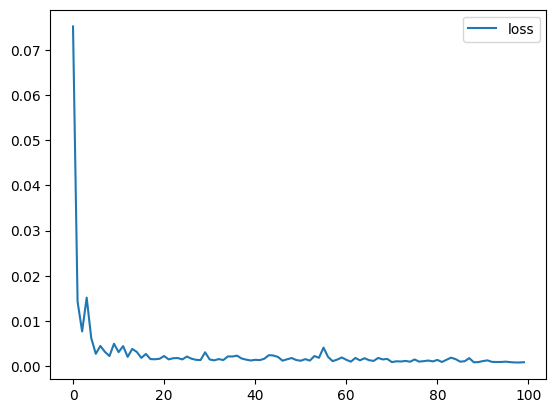

In [195]:
# Load the loss data into a dataframe
losses = pd.DataFrame(model.history.history)

# plot the losses and add correct lables
losses.plot()


##### Prediction for testing :  Using TimeseriesGenerator

In [196]:
# Create Time Series Generator for the test data

#bath_size must be 1
bathc_size1 = 1

# create a time series generator for the training data
test_tsGenerator60 = TimeseriesGenerator(normalized_test, normalized_test, length=lenght60, batch_size=bathc_size1)

##### Predict Fuure Data points for Testing

In [197]:
# predict the test data
normalized_prediction = model.predict(test_tsGenerator60)

C:\Users\babebe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [198]:
# print the normalized prediction
normalized_prediction

array([[0.67158663],
       [0.65764934],
       [0.6441284 ],
       [0.63393474],
       [0.6249122 ],
       [0.61655396],
       [0.6105916 ],
       [0.6042652 ],
       [0.59554243],
       [0.582344  ],
       [0.56591856],
       [0.5524525 ],
       [0.5440142 ],
       [0.54152375],
       [0.54435617],
       [0.5503602 ],
       [0.5486565 ],
       [0.5423206 ],
       [0.5335445 ],
       [0.52600944],
       [0.5224273 ],
       [0.5229705 ],
       [0.5255957 ],
       [0.5275648 ],
       [0.5297438 ],
       [0.53296643],
       [0.53728455],
       [0.54241294],
       [0.54558045],
       [0.546568  ],
       [0.5450544 ],
       [0.54458535],
       [0.5449468 ],
       [0.5449743 ],
       [0.5502015 ],
       [0.56041956],
       [0.57330143],
       [0.58855754],
       [0.60555273],
       [0.6222846 ],
       [0.63506407],
       [0.6423706 ],
       [0.643863  ],
       [0.6422369 ],
       [0.63861454],
       [0.63461936],
       [0.63098437],
       [0.628

In [199]:
len(normalized_prediction)

138

In [200]:
# convert the normalized prediction to the original scale

prediction = scaler.inverse_transform(normalized_prediction)

In [201]:
#flatten the prediction 2d array with index 1244 to 1382
prediction = prediction.flatten()
prediction_index = np.arange(1244,1382,step = 1)

# create a dataframe for the prediction
df_prediction = pd.DataFrame(data=prediction, index=prediction_index, columns=['Predictions'])

In [202]:
df_prediction

,Predictions
1244,42.200203
1245,41.647594
1246,41.111492
1247,40.707317
1248,40.349579
...,...
1377,46.653091
1378,46.697807
1379,46.652111
1380,46.634949


### Visualize Prediction

<Axes: >

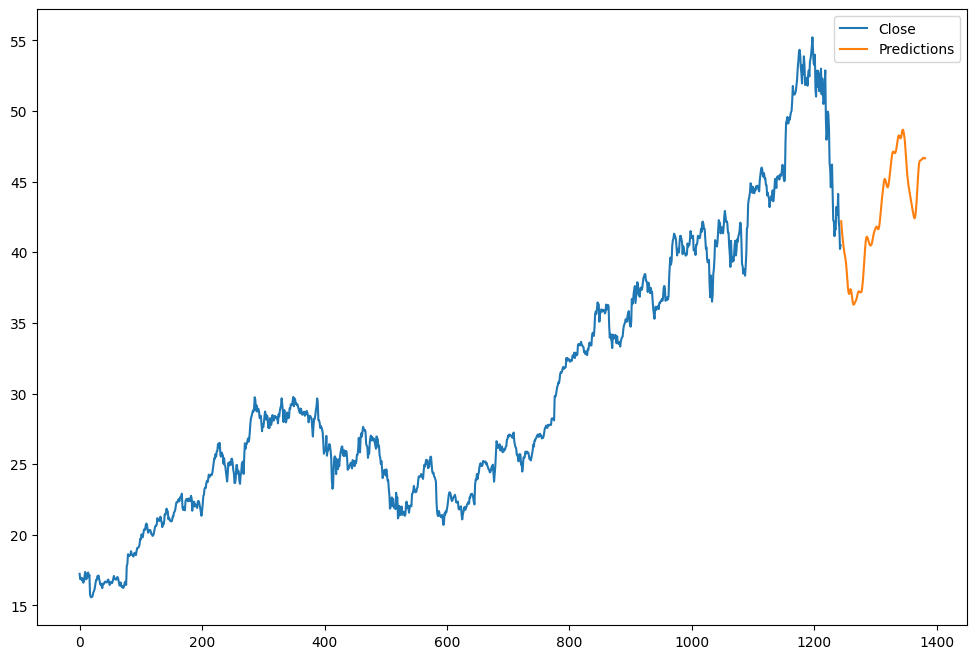

In [203]:
# plot the prediction next to the test data
ax=data_train.plot(figsize=(12,8))
df_prediction.plot(ax=ax,figsize=(12,8))

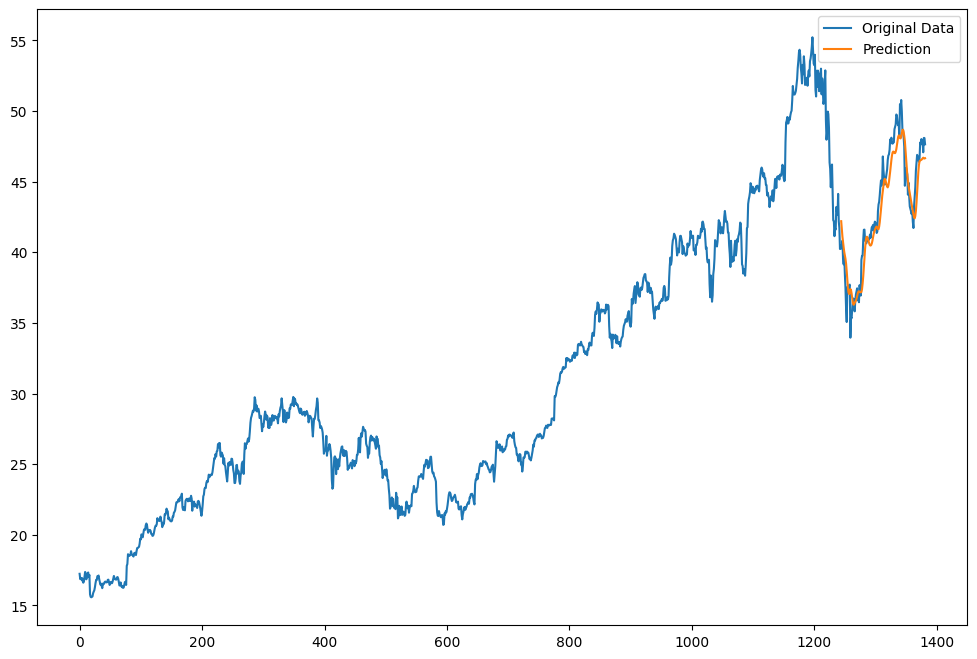

In [204]:
# plot the prediction
plt.figure(figsize=(12,8))
plt.plot(df.index, df.values, label='Original Data')
plt.plot(df_prediction.index, df_prediction.values, label='Prediction')
plt.legend()


#### Time Series Forecasting with RNN LSTM Neural Network

In [205]:
## still use minmaxscaler to normalize the data

full_scaler = MinMaxScaler()
normalized_full_data = full_scaler.fit_transform(df)

#### create a time series generator for the full data

In [206]:
# number of steps of the input time series
# length of the input time series is 60
lenght60

60

In [207]:
# Create Time Series Generator for forecasting the future data
# bath_size must be 1

forecast_tsGenerator = TimeseriesGenerator(normalized_full_data, normalized_full_data, length=lenght60, batch_size=bathc_size32)

## build, compile and train the model

In [208]:
# train/fit the model
model.fit(forecast_tsGenerator, epochs=100)

Epoch 1/100
 6/42 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.4878e-04

C:\Users\babebe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0010    
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0011
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 6.5738e-04
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 7.6247e-04
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 6.5514e-04
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 8.7520e-04
Epoch 7/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0013
Epoch 8/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 8.6616e-04
Epoch 9/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 9.5051e-04
Epoch 10/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 7.8228e-04
Epoch 11/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 6.9744e-04
Epoch 12/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 6.7687e-04
Epoch 13/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 6.6277e-04
Epoch 14/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 9.1981e-04
Epoch 15/100
42/42 ━━

In [224]:
# forecast the future data
forecast = []

# get the last 60 days of the normalized data
period = 117
first_eval_batch = normalized_full_data[-lenght60:]
current_batch = first_eval_batch.reshape((1, lenght60, n_features))

# forecast the future data
for i in range(period):
    # get the prediction
    current_pred = model.predict(current_batch)[0]
    # append the prediction to the forecast list
    forecast.append(current_pred)
    # update the current batch
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━

### inverse the forecast data ito the original scale

In [225]:
# convert the forecast list to an array
forecast = full_scaler.inverse_transform(forecast)

# print the forecast
forecast

array([[44.42629345],
       [43.65309626],
       [42.60345404],
       [41.53882847],
       [40.59329685],
       [39.77133526],
       [39.03318822],
       [38.35545194],
       [37.72573562],
       [37.13824679],
       [36.62279382],
       [36.19304603],
       [35.83100925],
       [35.5259068 ],
       [35.26621995],
       [35.0395579 ],
       [34.84330212],
       [34.66622453],
       [34.50054752],
       [34.34040301],
       [34.1814425 ],
       [34.02064335],
       [33.85622126],
       [33.68749086],
       [33.51464123],
       [33.33849951],
       [33.16032063],
       [32.98151547],
       [32.80350674],
       [32.62812837],
       [32.45638949],
       [32.28899909],
       [32.12637547],
       [31.96865097],
       [31.81568144],
       [31.66713129],
       [31.52254677],
       [31.38147883],
       [31.24359191],
       [31.10847713],
       [30.97562877],
       [30.8447774 ],
       [30.71547635],
       [30.58769255],
       [30.46121801],
       [30

In [226]:
df

,Close
0,17.234299
1,16.855726
2,16.947641
3,16.826441
4,16.932999
...,...
1377,47.804260
1378,47.079662
1379,48.097950
1380,48.083508


In [227]:
# create a dataframe for the forecast
forecast_index = np.arange(1382,1499,step = 1)

df_forecast = pd.DataFrame(data=forecast, index=forecast_index, columns=['Forecast'])

df_forecast

,Forecast
1382,44.426293
1383,43.653096
1384,42.603454
1385,41.538828
1386,40.593297
...,...
1494,22.508923
1495,22.472768
1496,22.438646
1497,22.406386


### Plot the forecast

<Axes: >

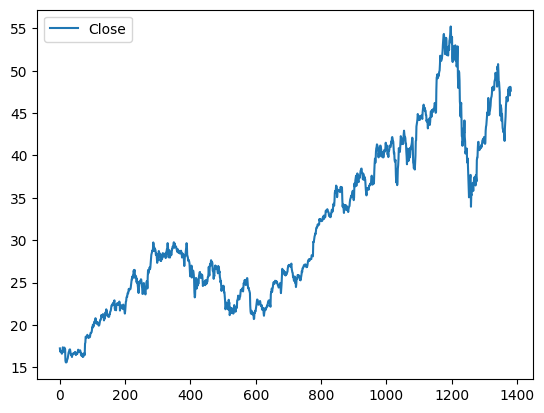

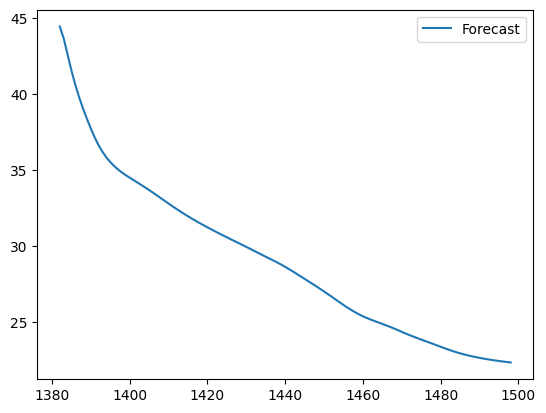

In [228]:
df.plot()
df_forecast.plot()

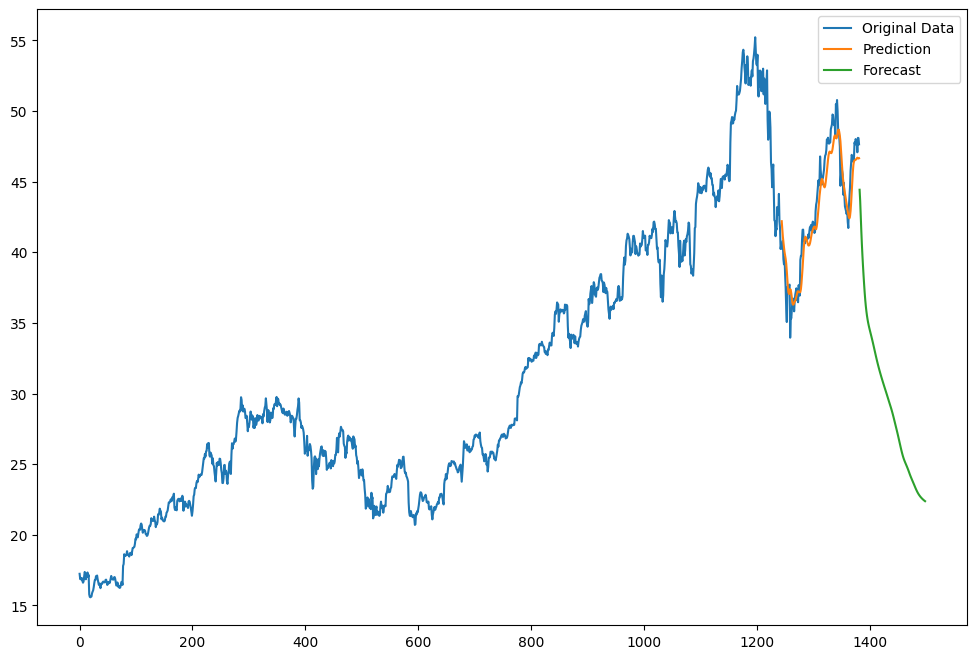

In [229]:
# plot the forecast
plt.figure(figsize=(12,8))
plt.plot(df.index, df.values, label='Original Data')
plt.plot(df_prediction.index, df_prediction.values, label='Prediction')
plt.plot(df_forecast.index, df_forecast.values, label='Forecast')
plt.legend()


In [230]:
df_ALL_JUL_DEC_2019 = apple.history(start="2019-07-01", end="2019-12-15")
df_ALL_JUL_DEC_2019.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-07-01 00:00:00-04:00,48.909216,49.226982,48.302574,48.519234,109012000,0.0,0.0
2019-07-02 00:00:00-04:00,48.485525,48.899582,48.473488,48.803288,67740800,0.0,0.0
2019-07-03 00:00:00-04:00,48.935687,49.214936,48.793657,49.207714,45448000,0.0,0.0
2019-07-05 00:00:00-04:00,48.952539,49.369001,48.844207,49.164379,69062000,0.0,0.0
2019-07-08 00:00:00-04:00,48.341093,48.483123,47.763341,48.150917,101354400,0.0,0.0


In [231]:
#change date as column 
df_ALL_JUL_DEC_2019.reset_index(inplace=True)


#change datetime column to date
df_ALL_JUL_DEC_2019['Date'] = df_ALL_JUL_DEC_2019['Date'].dt.date   
df_ALL_JUL_DEC_2019.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-07-01,48.909216,49.226982,48.302574,48.519234,109012000,0.0,0.0
1,2019-07-02,48.485525,48.899582,48.473488,48.803288,67740800,0.0,0.0
2,2019-07-03,48.935687,49.214936,48.793657,49.207714,45448000,0.0,0.0
3,2019-07-05,48.952539,49.369001,48.844207,49.164379,69062000,0.0,0.0
4,2019-07-08,48.341093,48.483123,47.763341,48.150917,101354400,0.0,0.0


In [232]:
#only get close price and use iloc
df_JUL_DEC_2019 = df_ALL_JUL_DEC_2019.iloc[:,4]

<Axes: >

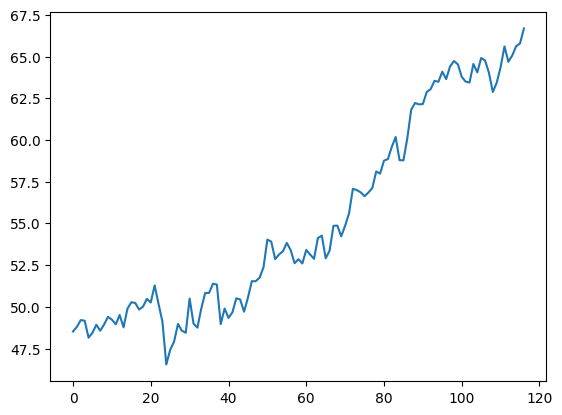

In [219]:
df_JUL_DEC_2019.plot()

In [233]:
df_forecast['Forecast'].values

array([44.42629345, 43.65309626, 42.60345404, 41.53882847, 40.59329685,
       39.77133526, 39.03318822, 38.35545194, 37.72573562, 37.13824679,
       36.62279382, 36.19304603, 35.83100925, 35.5259068 , 35.26621995,
       35.0395579 , 34.84330212, 34.66622453, 34.50054752, 34.34040301,
       34.1814425 , 34.02064335, 33.85622126, 33.68749086, 33.51464123,
       33.33849951, 33.16032063, 32.98151547, 32.80350674, 32.62812837,
       32.45638949, 32.28899909, 32.12637547, 31.96865097, 31.81568144,
       31.66713129, 31.52254677, 31.38147883, 31.24359191, 31.10847713,
       30.97562877, 30.8447774 , 30.71547635, 30.58769255, 30.46121801,
       30.33585659, 30.21136723, 30.08584511, 29.95888137, 29.8306249 ,
       29.70151765, 29.57207244, 29.44288247, 29.31459764, 29.18783478,
       29.06256081, 28.93117769, 28.79372325, 28.64971064, 28.49938565,
       28.34373141, 28.184082  , 28.02209647, 27.85924007, 27.69646756,
       27.53480935, 27.37126285, 27.2043392 , 27.03386351, 26.85

In [234]:
# add the forecast to the original data as Forecast column as dataframe
df_JUL_DEC_2019 = df_JUL_DEC_2019.to_frame()



In [235]:
# Ensure the forecast values match the length of the index
forecast_values = df_forecast['Forecast'].values

# Truncate or pad the forecast values to match the length of the index
if len(forecast_values) > len(df_JUL_DEC_2019):
	forecast_values = forecast_values[:len(df_JUL_DEC_2019)]
else:
	forecast_values = np.pad(forecast_values, (0, len(df_JUL_DEC_2019) - len(forecast_values)), 'constant', constant_values=np.nan)

# Add the forecast to the original data as Forecast column as dataframe
df_JUL_DEC_2019['Forecast'] = forecast_values

In [236]:
df_JUL_DEC_2019

,Close,Forecast
0,48.519234,44.426293
1,48.803288,43.653096
2,49.207714,42.603454
3,49.164379,41.538828
4,48.150917,40.593297
...,...,...
112,64.693573,22.508923
113,65.071671,22.472768
114,65.626694,22.438646
115,65.793930,22.406386


<Axes: >

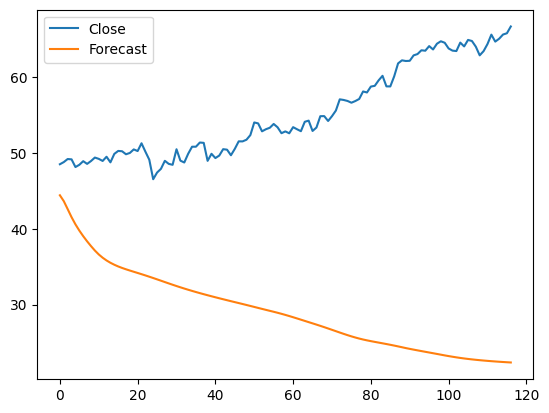

In [237]:
df_JUL_DEC_2019.plot()